**Student Information**

Name: 江致勳

Student ID: 111030512
    
GitHub ID: https://github.com/Tor2726

# **Data Preparation**


In [129]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [130]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

## **Exercise 1 (5 min):**
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [131]:
# Answer here
for i in range(0,3):
    print('Sample #' + str(i+1) + ' is:')
    print("\n".join(twenty_train.data[i].split("\n")))

Sample #1 is:
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

Sample #2 is:
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have 

## Data Transformation


### Converting Dictionary into Pandas Dataframe

In [132]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### Adding Columns

In [133]:
# add category to the dataframe
X['category'] = twenty_train.target

In [134]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Familiarizing yourself with the Data

### **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [135]:
#Answer here

print(X.head(10))
print(X.tail(10))
print(X.text)
print(X.category)


                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci

---

### **Exercise 3 (5 min):**
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [136]:
# Answer here
X[X.category_name=='sci.med'].iloc[::10].head(5)


,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


---

## Data Mining using Pandas

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [137]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)


0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [138]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [139]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [140]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [141]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [142]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [143]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [144]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [145]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [146]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [147]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here**

According to the isnull() documentation (https://pandas.pydata.org/docs/reference/api/pandas.isnull.html), the function isnull()
will label the nan, None, NaN, and NaT in different data format. So, #0 and #4 will be recognized as null, in #2, because there's
nothing in the cell, so it will be recognized as null too. For other cases (#1, #3, and #5), because there're text data (the '' 
exists), so, they won't be recognized as null.


---

## Data Preprocessing

### Sampling

In [149]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


### **Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**Answer here**

1. Dataset size. From 2257 changed to 1000.
2. The sequence of the dataset. The sequence of X_sample dataset has changed after sampling.
3. The ratio of each category. Because the random sampling, the ratio of each category has changed.


In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

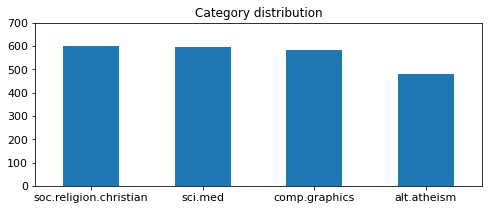

In [152]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

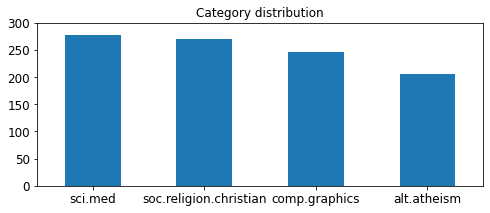

In [153]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

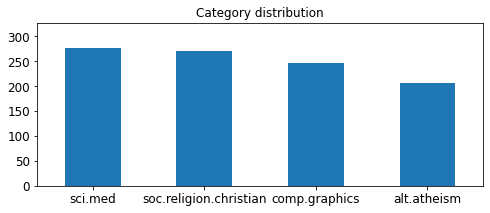

In [154]:
# Answer here

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

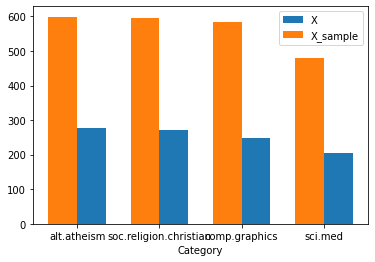

In [155]:
# Answer here

index = np.arange(len(categories))
bar_width = 0.35
plt.bar(index + bar_width, X_sample.category_name.value_counts(), width=bar_width, label='X')
plt.bar(index, X.category_name.value_counts(), width=bar_width, label='X_sample')

plt.xlabel('Category')
plt.xticks(index + bar_width / 2, categories)

plt.legend()

plt.show()


![alt txt](https://i.imgur.com/9eO431H.png)

---

### Feature Creation


In [156]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kenny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [157]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


### Feature subset selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

In [ ]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

In [ ]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

### **Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [161]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [162]:
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

### **Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [163]:
# Answer here
count_vect.get_feature_names_out()[37]

'01'

---

In [ ]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

In [ ]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

In [ ]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **Exercise 11 (take home):** 

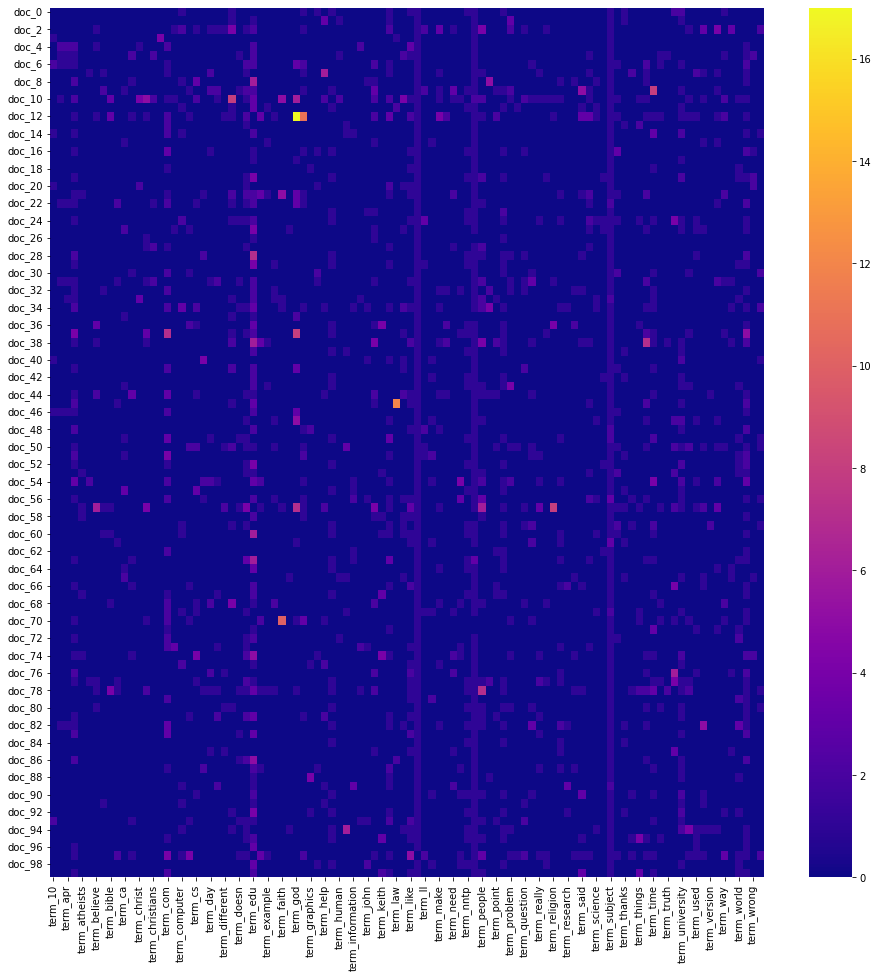

In [168]:
# Answer here
"""
Cause there're too many features in the original CountVectorizer, which makes it too hard to make a quick & easy to understand 
visualization, so I retrain another CountVectorizer, which only reserved top 100 important features, so the heatmap will be
easier to understand, and I use the cmap with high contrast template, remove the annot in the figure, and remove the upper limit
to make the figure easier to understand and more appealing.
"""

count_vect_exercise = CountVectorizer(max_features=100, stop_words='english')
X_count_exercise = count_vect_exercise.fit_transform(X.text) #learn the vocabulary and return document-term matrix

plot_x_answer = ["term_"+str(i) for i in count_vect_exercise.get_feature_names_out()[0:100]]
plot_y_answer = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z_answer = X_count_exercise[0:100, 0:100].toarray() #X_counts[how many documents, how many terms]

df_todraw_answer = pd.DataFrame(plot_z_answer, columns = plot_x_answer, index = plot_y_answer)
# display(df_todraw_answer)
plt.subplots(figsize=(16,16))
ax = sns.heatmap(df_todraw_answer,
                 cmap='plasma',
                 vmin=0)

---

### Dimensionality Reduction


In [169]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 3)


### **Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

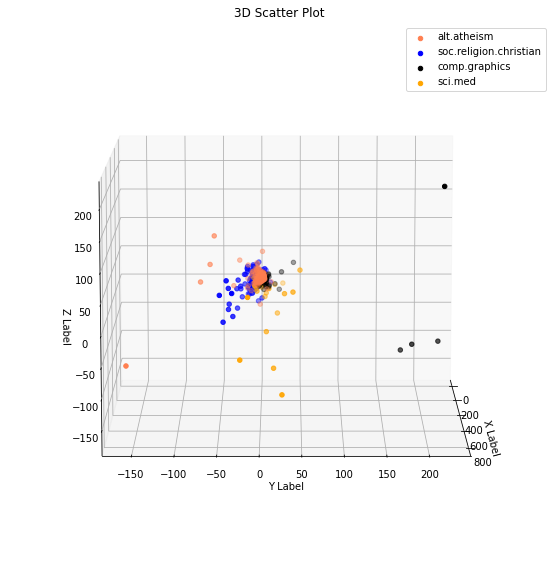

In [170]:
# Answer here

'''
1. comp.graphics has higher value in Y label.
2. sci.med has a little bit higher in X & Y label.
3. The data distribution of alt.atheism is more discrete.
'''

from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]  
   
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

ax.view_init(elev=10, azim=0)
# ax.view_init(elev=0, azim=45)
# ax.view_init(elev=90, azim=90)
ax.legend()

plt.show()


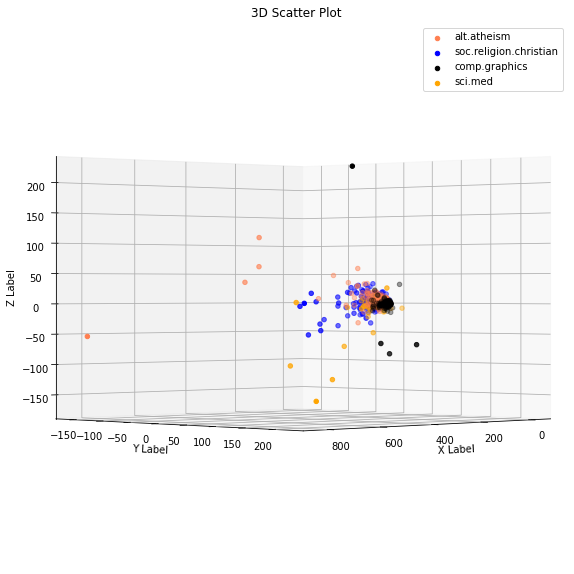

In [171]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]  
   
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# ax.view_init(elev=10, azim=0)
ax.view_init(elev=0, azim=45)
# ax.view_init(elev=90, azim=90)
ax.legend()

plt.show()


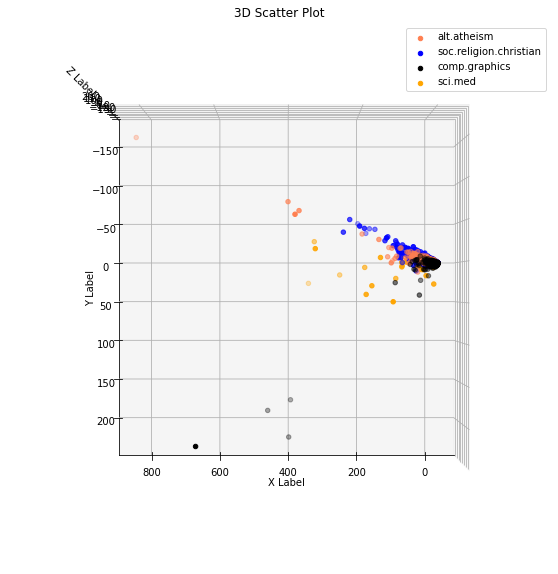

In [172]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]  
   
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# ax.view_init(elev=10, azim=0)
# ax.view_init(elev=0, azim=45)
ax.view_init(elev=90, azim=90)
ax.legend()

plt.show()


### Attribute Transformation / Aggregation

In [173]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [174]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [175]:
# Answer here
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

df = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
})

fig = px.bar(df, x='Terms', y='Frequencies', labels={'Frequencies': 'Term Frequencies'}, title='Term Frequencies')
fig.update_xaxes(tickangle=90, tickmode='array', tickvals=list(range(300)), ticktext=df['Terms'])
fig.show()


---

### **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

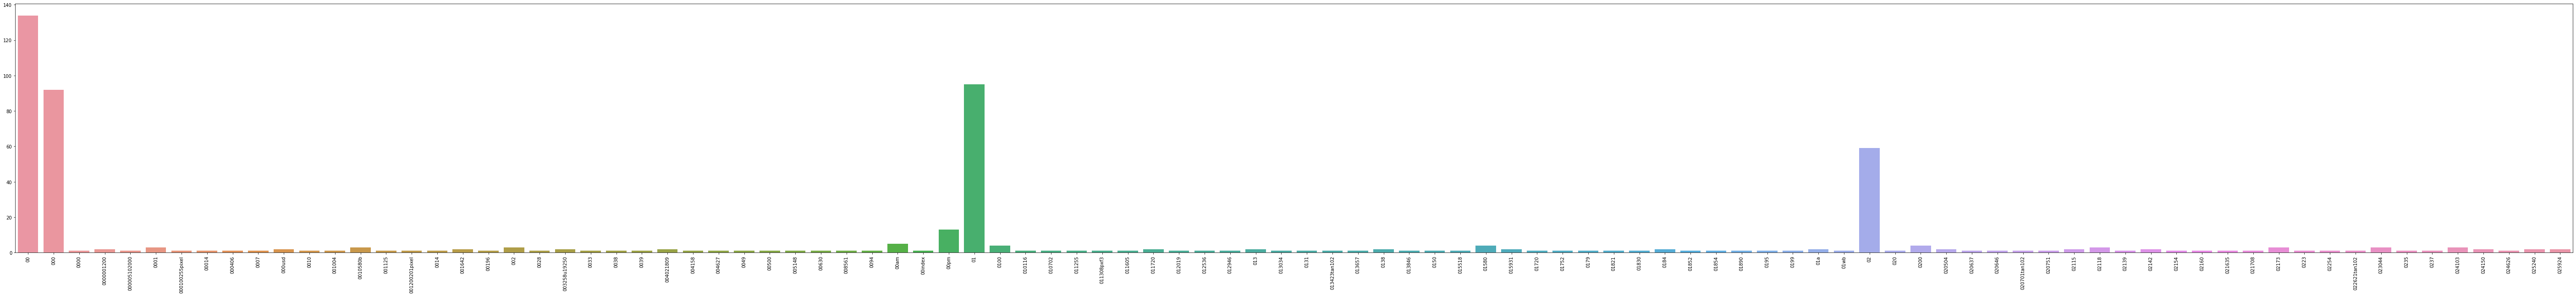

In [176]:
# Answer here
' Just change the number from 300 to 100.'
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)


---

### **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [177]:
# Answer here
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

df = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
})

df_sorted = df.sort_values(by='Frequencies', ascending=False)

fig = px.bar(df_sorted, x='Terms', y='Frequencies', labels={'Frequencies': 'Term Frequencies'}, title='Term Frequencies')
fig.update_xaxes(tickangle=90, tickmode='array', tickvals=list(range(300)), ticktext=df_sorted['Terms'])
fig.show()


---

In [178]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

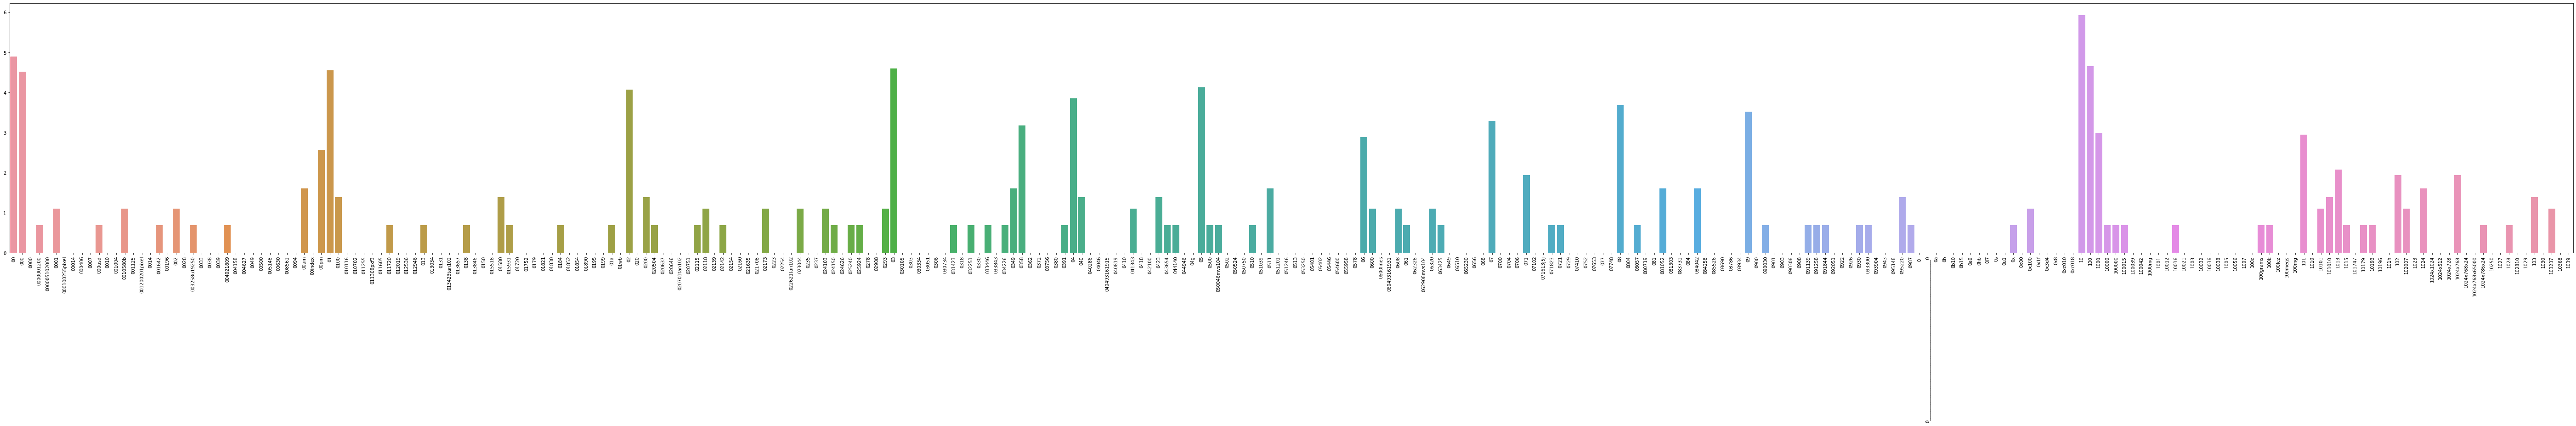

In [179]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

---

### **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [180]:
# Answer here
'''
It works!
'''
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb_2 = preprocessing.LabelBinarizer()

mlb_2.fit(X.category_name)

X['bin_category_name'] = mlb_2.transform(X['category_name']).tolist()

X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


---

# **The SECOND session of the homework**

## Data Preparation

### Import libraries

In [181]:
import pandas as pd
import numpy as np
import os
import helpers.data_mining_helpers as dmh

### Import dataset and combine 3 datasets into 1

In [182]:
data_dir = r'D:\Kenny_清大\課業\二上\資料探勘與應用\HW1\sentiment labelled sentences'

df = pd.DataFrame(columns=['Source', 'Sentence', 'Label'])

# Read 3 text files
for source in ['imdb_labelled', 'amazon_cells_labelled', 'yelp_labelled']:
    file_path = os.path.join(data_dir, f'{source}.txt')
    
    # Using the provided format to read each text file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        data = [line.strip().split('\t') for line in lines]
    
    # Read data as df
    temp_df = pd.DataFrame({
        'Label': [int(row[1]) for row in data],
        'Sentence': [row[0] for row in data],
        'Source': [source] * len(data)
    })
    
    # Concat the diff dataset
    df = pd.concat([df, temp_df], ignore_index=True)

print(df.head())


          Source                                           Sentence Label
0  imdb_labelled  A very, very, very slow-moving, aimless movie ...     0
1  imdb_labelled  Not sure who was more lost - the flat characte...     0
2  imdb_labelled  Attempting artiness with black & white and cle...     0
3  imdb_labelled       Very little music or anything to speak of.       0
4  imdb_labelled  The best scene in the movie was when Gerardo i...     1


## Data Mining

In [183]:
# Split the sentence column into X
X = df

### Missing Value

In [184]:
X.isnull()

,Source,Sentence,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [185]:
X.isnull().apply(lambda X: dmh.check_missing_values(X))


,Source,Sentence,Label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


There's no missing value in our dataset.


### Dealing with duplicate data

In [186]:
sum(X.duplicated())


17

In [187]:
# Print out the duplicate data
mask = X.duplicated(keep=False)

print(X[mask])


                     Source  \
90            imdb_labelled   
125           imdb_labelled   
363           imdb_labelled   
572           imdb_labelled   
585           imdb_labelled   
788           imdb_labelled   
1018  amazon_cells_labelled   
1179  amazon_cells_labelled   
1180  amazon_cells_labelled   
1187  amazon_cells_labelled   
1262  amazon_cells_labelled   
1285  amazon_cells_labelled   
1290  amazon_cells_labelled   
1392  amazon_cells_labelled   
1402  amazon_cells_labelled   
1407  amazon_cells_labelled   
1446  amazon_cells_labelled   
1524  amazon_cells_labelled   
1543  amazon_cells_labelled   
1647  amazon_cells_labelled   
1744  amazon_cells_labelled   
1748  amazon_cells_labelled   
1778  amazon_cells_labelled   
1792  amazon_cells_labelled   
1892  amazon_cells_labelled   
1896  amazon_cells_labelled   
2334          yelp_labelled   
2380          yelp_labelled   
2383          yelp_labelled   
2505          yelp_labelled   
2814          yelp_labelled   
2816    

In [188]:
# Drop the duplicate data
X.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe

len(X)


2983

## Data Preprocessing

### Sampling

In [189]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)


(2983, 3)


,Source,Sentence,Label
2423,yelp_labelled,We've tried to like this place but after 10+ t...,0
1554,amazon_cells_labelled,I give Wirefly 1 star.I will contact Cingular/...,0
884,imdb_labelled,This is probably one of the least effective an...,0
331,imdb_labelled,"For those that haven't seen it, don't waste yo...",0
1848,amazon_cells_labelled,Not good enough for the price.,0
...,...,...,...
919,imdb_labelled,"Characters are one-dimensional, even the good ...",0
1214,amazon_cells_labelled,fast service.,1
2724,yelp_labelled,Awesome selection of beer.,1
2470,yelp_labelled,"Very good, though!",1


In [190]:
len(X_sample)

1000

In [191]:
X_sample[0:4]

,Source,Sentence,Label
2423,yelp_labelled,We've tried to like this place but after 10+ t...,0
1554,amazon_cells_labelled,I give Wirefly 1 star.I will contact Cingular/...,0
884,imdb_labelled,This is probably one of the least effective an...,0
331,imdb_labelled,"For those that haven't seen it, don't waste yo...",0


In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
categories = pd.unique(df.Label)

0    1493
1    1490
Name: Label, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

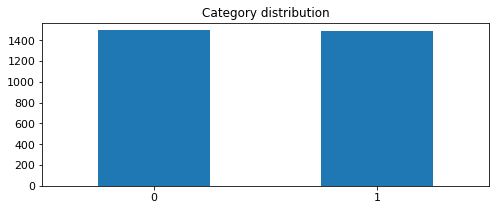

In [194]:
print(X.Label.value_counts())

# plot barchart for X
X.Label.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))


504
0    504
1    496
Name: Label, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

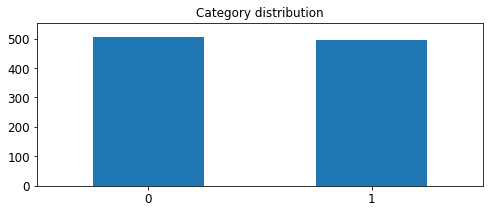

In [195]:
# plot barchart for X_sample
print(max(X_sample.Label.value_counts()))
upper_bound = max(X_sample.Label.value_counts() + 50) #277 + 50
print(X_sample.Label.value_counts())

X_sample.Label.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


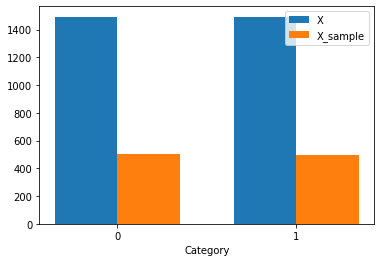

In [196]:
# Answer here

index = np.arange(len(categories))
bar_width = 0.35
plt.bar(index , X.Label.value_counts(), width=bar_width, label='X')
plt.bar(index+ bar_width, X_sample.Label.value_counts(), width=bar_width, label='X_sample')

plt.xlabel('Category')
plt.xticks(index + bar_width / 2, categories)

plt.legend()

plt.show()


### Feature Creation

In [197]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kenny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
# takes a like a minute or two to process
X['unigrams'] = X['Sentence'].apply(lambda x: dmh.tokenize_text(x))


In [199]:
X[0:4]

,Source,Sentence,Label,unigrams
0,imdb_labelled,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,imdb_labelled,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,imdb_labelled,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
3,imdb_labelled,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."


In [200]:
list(X[0:1]['unigrams'])

[['A',
  'very',
  ',',
  'very',
  ',',
  'very',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.']]

### Feature subset selection

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])


(2983, 5155)
  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1


In [202]:
count_vect.get_feature_names_out()[4133]

'slow'

In [203]:
analyze = count_vect.build_analyzer()
analyze(X.Sentence[0])


['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [204]:
analyze(" ".join(list(X[:1].Sentence)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [205]:
X_counts.shape

(2983, 5155)

In [206]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [207]:
X_counts.shape

(2983, 5155)

In [208]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [209]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [210]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [211]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [212]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


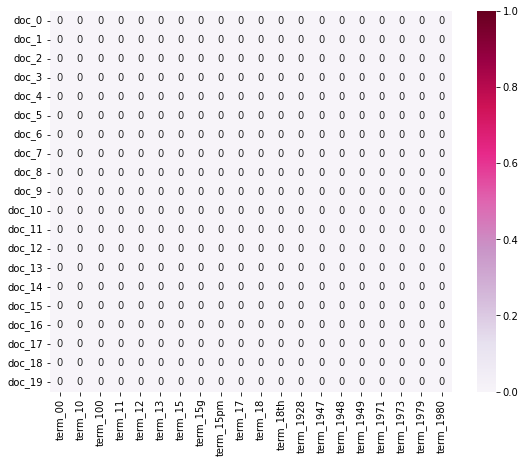

In [213]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

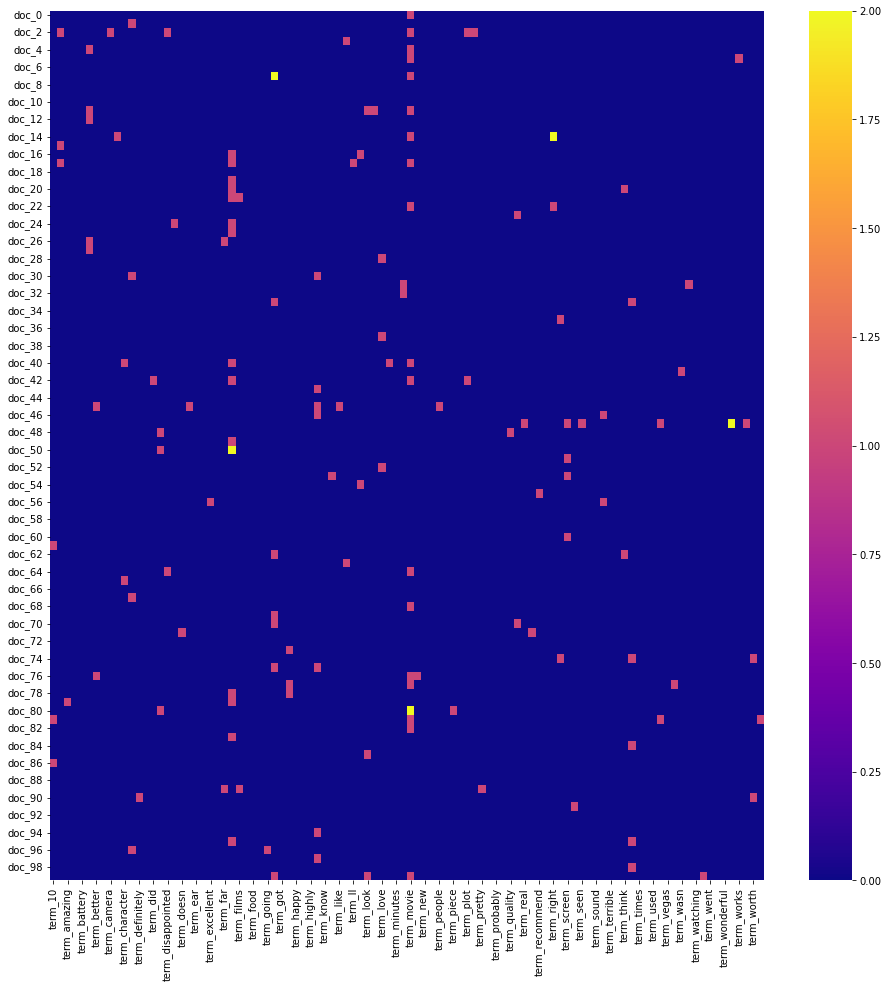

In [214]:
# Answer here
"""
Cause there're too many features in the original CountVectorizer, which makes it too hard to make a quick & easy to understand 
visualization, so I retrain another CountVectorizer, which only reserved top 100 important features, so the heatmap will be
easier to understand, and I use the cmap with high contrast template, remove the annot in the figure, and remove the upper limit
to make the figure easier to understand and more appealing.
"""

count_vect_exercise = CountVectorizer(max_features=100, stop_words='english')
X_count_exercise = count_vect_exercise.fit_transform(X.Sentence) #learn the vocabulary and return document-term matrix

plot_x_answer = ["term_"+str(i) for i in count_vect_exercise.get_feature_names_out()[0:100]]
plot_y_answer = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z_answer = X_count_exercise[0:100, 0:100].toarray() #X_counts[how many documents, how many terms]

df_todraw_answer = pd.DataFrame(plot_z_answer, columns = plot_x_answer, index = plot_y_answer)
# display(df_todraw_answer)
plt.subplots(figsize=(16,16))
ax = sns.heatmap(df_todraw_answer,
                 cmap='plasma',
                 vmin=0)

### Dimensionality Reduction

In [215]:
from sklearn.decomposition import PCA

In [216]:
print(X_counts.shape)
X_reduced = PCA(n_components = 10).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2983, 5155)
(2983, 10)


In [217]:
X_reduced.shape

(2983, 10)

In [218]:
categories

array([0, 1], dtype=object)

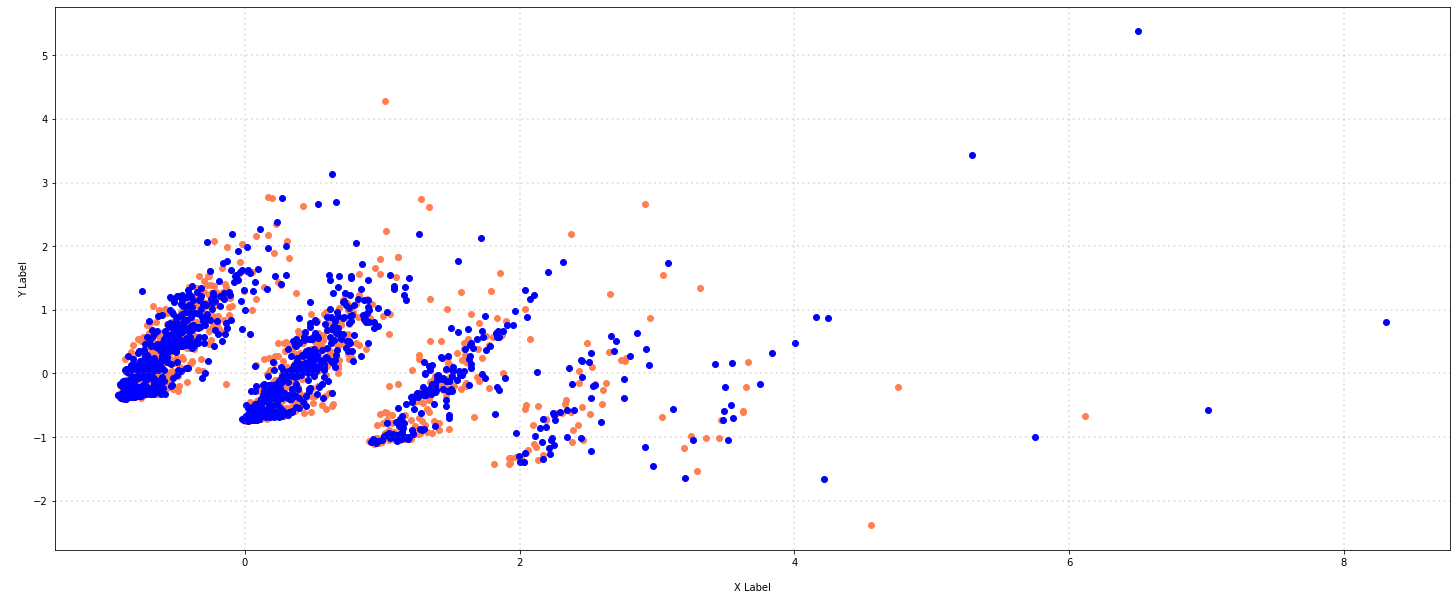

In [219]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['Label'] == category].T[0]
    ys = X_reduced[X['Label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

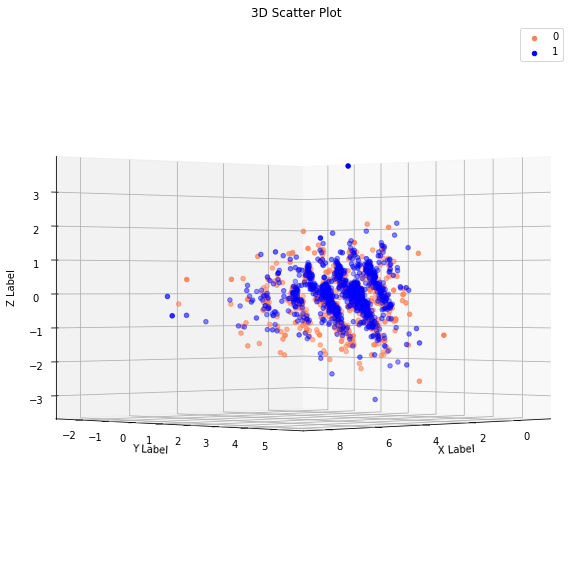

In [220]:
# Answer here

'''
1. comp.graphics has higher value in Y label.
2. sci.med has a little bit higher in X & Y label.
3. The data distribution of alt.atheism is more discrete.
'''

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['Label'] == category].T[0]
    ys = X_reduced[X['Label'] == category].T[1]
    zs = X_reduced[X['Label'] == category].T[2]  
   
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# ax.view_init(elev=10, azim=0)
ax.view_init(elev=0, azim=45)
# ax.view_init(elev=90, azim=90)
ax.legend()

plt.show()


### Attribute Transformation / Aggregation

In [221]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

5155


In [222]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [223]:
term_frequencies[0] #sum of first term: 00

1

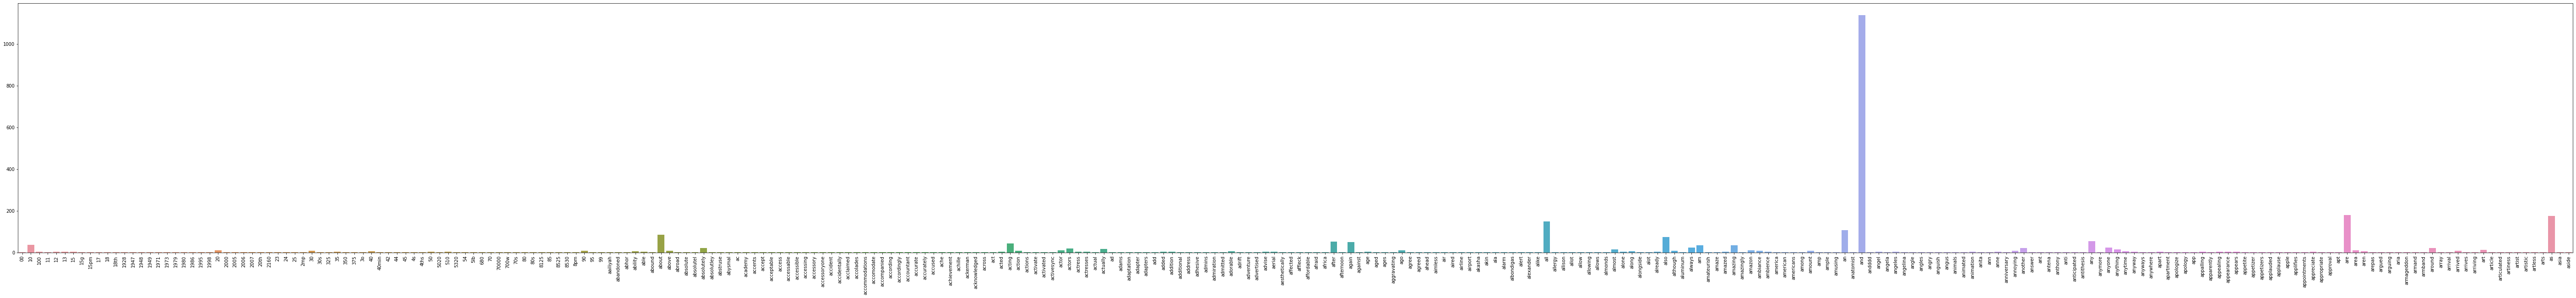

In [224]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [225]:
# Answer here
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

df_drawing = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
})

fig = px.bar(df_drawing, x='Terms', y='Frequencies', labels={'Frequencies': 'Term Frequencies'}, title='Term Frequencies')
fig.update_xaxes(tickangle=90, tickmode='array', tickvals=list(range(300)), ticktext=df_drawing['Terms'])
fig.show()


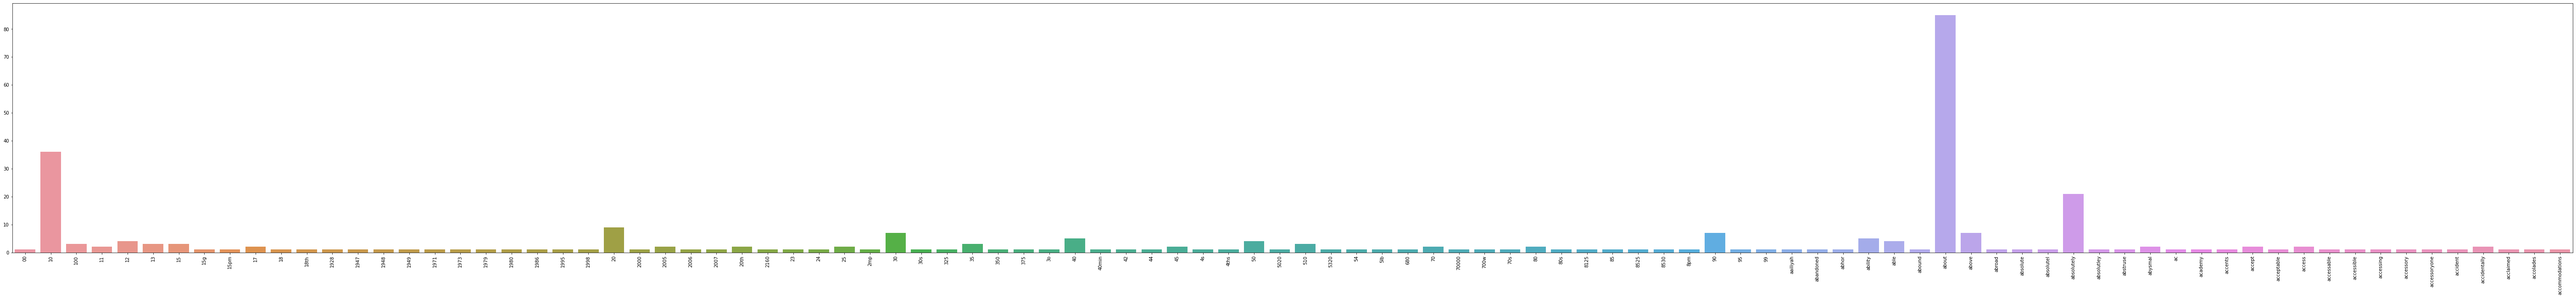

In [226]:
# Answer here
' Just change the number from 300 to 100.'
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

In [227]:
# Answer here
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

df_drawing = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
})

df_sorted = df_drawing.sort_values(by='Frequencies', ascending=False)

fig = px.bar(df_sorted, x='Terms', y='Frequencies', labels={'Frequencies': 'Term Frequencies'}, title='Term Frequencies')
fig.update_xaxes(tickangle=90, tickmode='array', tickvals=list(range(300)), ticktext=df_sorted['Terms'])
fig.show()


In [228]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


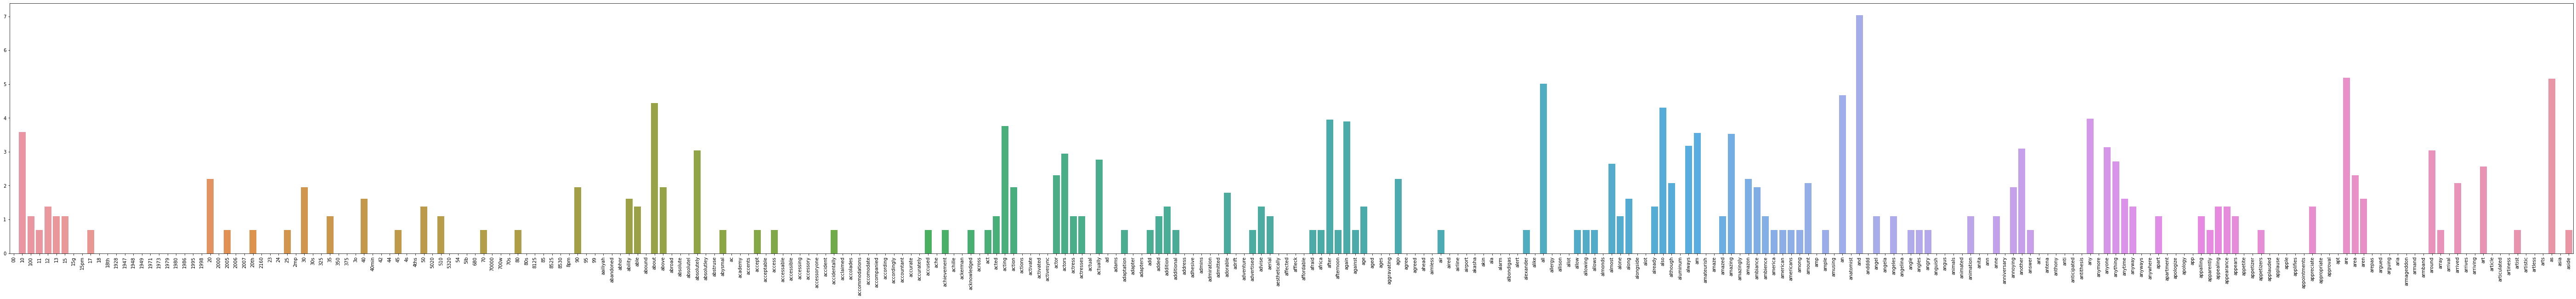

In [229]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### Discretization and Binarization

In [230]:
'''
Since we only have 2 categories (0 & 1), so we dont need to use discretization and binarization.
'''

'\nSince we only have 2 categories (0 & 1), so we dont need to use discretization and binarization.\n'

## Data Exploration

In [231]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[200]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[300]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)

In [232]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["I'm glad the film didn't go for the most obvious choice, as a lesser film certainly would have.  "]
['This is definitely one of the bad ones.  ']
['I recommend this for EVERYONE who loves film, movies, anything...A Work of Art!  ']


In [233]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [234]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.158114
Cosine Similarity using count bw 1 and 3: 0.193649
Cosine Similarity using count bw 2 and 3: 0.204124
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# **The THIRD session of the homework**

## New data visualization

### TreeMap

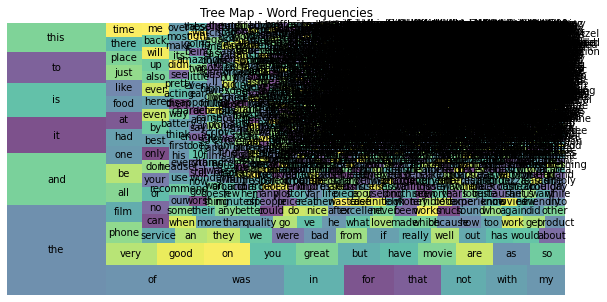

In [235]:
import squarify
import matplotlib.pyplot as plt

# Get frequence
features = count_vect.get_feature_names_out()
word_freq = dict(zip(features, X_counts.sum(axis=0).A1))
data = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}

# Setup the figure format
fig, ax = plt.subplots(figsize=(10, 5))
squarify.plot(sizes=data.values(), label=data.keys(), alpha=0.7, ax=ax)
plt.title("Tree Map - Word Frequencies")
plt.axis('off')

plt.show()


Because the figure above is messy and hard to understand, so I choose the top 300 important texts to draw the treemap, which makes the figure easire to read.

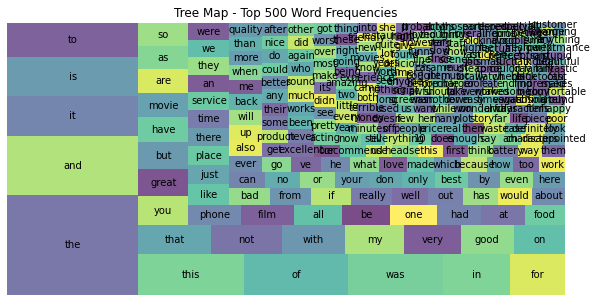

In [236]:
# Get frequence
features = count_vect.get_feature_names_out()
word_freq = dict(zip(features, X_counts.sum(axis=0).A1))
word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:300])
data = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}

# Setup the figure format
fig, ax = plt.subplots(figsize=(10, 5))
sizes_factor = 10
squarify.plot(sizes=[sizes_factor * value for value in data.values()], label=data.keys(), alpha=0.7, ax=ax)
plt.title("Tree Map - Top 500 Word Frequencies")
plt.axis('off')

plt.show()


### WordCloud

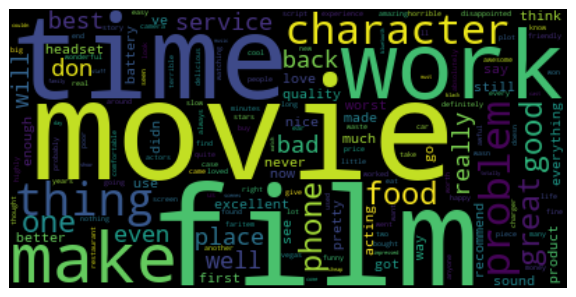

In [243]:
from wordcloud import WordCloud

# Get top 300 important features and combine them into a sentence
features = count_vect.get_feature_names_out()
word_freq = dict(zip(features, X_counts.sum(axis=0).A1))
top_words = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:300]
top_features = [word[0] for word in top_words]
sentence = ' '.join(top_features)

# Using the code provided by TA. (Because of the version issue, I cannot import the whole package, sorry about just copy & paste the code.)
def plot_word_cloud(text):
    """ Generate word cloud given some input text doc """
    word_cloud = WordCloud().generate(text)
    plt.figure(figsize=(8,6), dpi=90)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
plot_word_cloud(sentence)


## TF-IDF

In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_counts_tfidf = tfidf_vectorizer.fit_transform(df.Sentence) #learn the vocabulary and return document-term matrix
print(X_counts_tfidf.shape)
print(X_counts_tfidf[0])


(2983, 5155)
  (0, 2764)	0.2735103964807841
  (0, 5139)	0.3177752926016704
  (0, 1401)	0.35716801712310786
  (0, 1331)	0.35716801712310786
  (0, 75)	0.19804344676033453
  (0, 2954)	0.16541966246637677
  (0, 166)	0.35716801712310786
  (0, 2956)	0.3099370131001265
  (0, 4133)	0.25817640114336615
  (0, 4890)	0.46065504591821976


In [240]:
tfidf_vectorizer.get_feature_names_out()[4133]

'slow'

## Naive Bayes classifier

### CountVectorizer()

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing
X = X_counts
y = df['Label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup the classifier and predict
nb_classifier = BernoulliNB(binarize=None)
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Evaluation & Draw confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8241206030150754
Confusion Matrix:
[[258  56]
 [ 49 234]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       314
           1       0.81      0.83      0.82       283

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597



### TfidfVectorizer()

In [242]:
# Split the data into training and testing
X = X_counts_tfidf
y = df['Label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup the classifier and predict
nb_classifier = BernoulliNB(binarize=None)
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Evaluation & Draw confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7989949748743719
Confusion Matrix:
[[235  79]
 [ 41 242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       314
           1       0.75      0.86      0.80       283

    accuracy                           0.80       597
   macro avg       0.80      0.80      0.80       597
weighted avg       0.81      0.80      0.80       597



### Comparison of 2 NLP methods

In accuracy, there's no signicficant difference between 2 NLP methods. But if we use confusion matrix to evaluate the methods, we can find that using CountVectorizer can predict the class 0 better, and TFIDF vectorizer can predict the class 1 better. If we use F1 score to evaluate, it can be summarized that CountVecorizer is better. 


# **Fourth**

I think one of the most inefficient part is **the line in each cells**. While it's crucial to enhance code readability through cell separation, some cells consist of only one or two lines of code, and their content is quite similar to the cell above or below. Consequently, these cells could easily be combined into one, making it easier for the reader to navigate and understand the code.

There are still many approaches we can try, such as cross-validation, setting a maximum limit for the words chosen in an NLP setting, or perhaps feature selection, PCA, hyperparameter tuning, and so on. Maybe the performance will show more differences after applying these methods.

Additionally, we can explore different NLP methods, such as the transformer-based model **BERT**, considered one of the most powerful NLP methods.
